## Research question 5
Does lack of family support or educational support contribute as a factor to consuming alcohol?


In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import set_config
set_config(transform_output = "pandas")

## function to save hq figs

In [2]:
from pathlib import Path
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')
for col in X_test.columns:
    print(col)

sex_F
sex_M
famsize_GT3
famsize_LE3
Pstatus_A
Pstatus_T
Mjob_at_home
Mjob_health
Mjob_other
Mjob_services
Mjob_teacher
Fjob_at_home
Fjob_health
Fjob_other
Fjob_services
Fjob_teacher
guardian_father
guardian_mother
guardian_other
schoolsup_no
schoolsup_yes
famsup_no
famsup_yes
paid_no
paid_yes
activities_no
activities_yes
higher_no
higher_yes
romantic_no
romantic_yes
age
Medu
Fedu
studytime
failures
famrel
freetime
goout
health
absences
avg_grade
alc


In [4]:
# Separate target from dataset
y_train = X_train['alc']
#X_train = X_train.drop(columns = ['alc'])
X_train = X_train [['famsup_no', 'famsup_yes']] 
y_test = X_test['alc']
X_test = X_test [['famsup_no', 'famsup_yes']]
#X_test = X_test.drop(columns = 'alc')

## ZeroR Classifier

In [5]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")



In [6]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='most_frequent')

In [7]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(y_train, dummy.predict(X_train)))
print('Test Accuracy', accuracy_score(y_test, dummy.predict(X_test)))

Train Accuracy 0.5
Test Accuracy 0.6076555023923444


## KNN Classifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [9]:
# Predicting Alcohol Consumption
y_pred = knn.predict(X_test)

In [10]:
pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

,y_test,y_pred
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,0.0
4,0.0,0.0
...,...,...
204,0.0,1.0
205,0.0,1.0
206,0.0,0.0
207,0.0,1.0


In [11]:
# !pip install scikit-plot


In [12]:
import scikitplot as skplt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.4688995215311005


              precision    recall  f1-score   support

         0.0       0.61      0.36      0.45       127
         1.0       0.39      0.63      0.48        82

    accuracy                           0.47       209
   macro avg       0.50      0.50      0.47       209
weighted avg       0.52      0.47      0.47       209



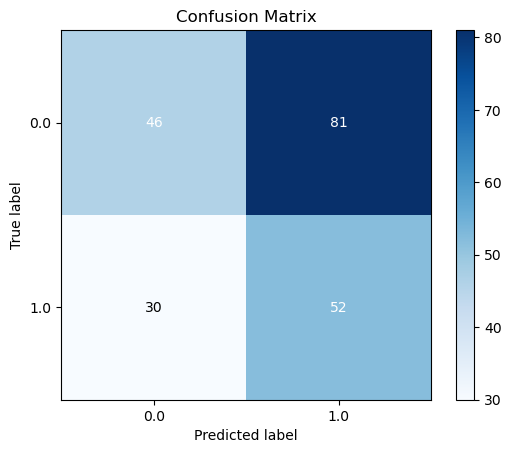

In [14]:
print(classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
#save_fig('Confusion Matrix for KNN q3')


## Decision Tree

In [16]:
from matplotlib import pyplot as plt
from sklearn import tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('Accuracy ', accuracy_score(y_test, dt.predict(X_test)).round(3))

Accuracy  0.531


In [18]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Max Depth =  1 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  2 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  3 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  4 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  5 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  6 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  7 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  8 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  9 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  10 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  11 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  12 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  13 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  14 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  15 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  16 , Train Acc. =  0.538 , Test Acc. =  0.531
Max Depth =  17 , Train Acc. =  0.538 , Test Acc. =  0.531
Max De

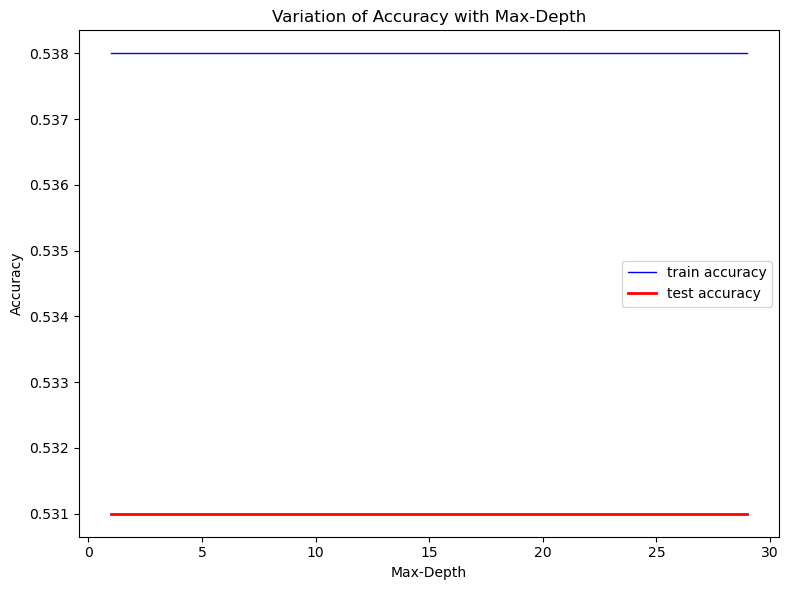

In [19]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [20]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, dt.predict(X_train)))


Confusion Matrix for Train Set


,0,1
0,286,160
1,252,194


In [21]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, dt.predict(X_test)))

Confusion Matrix for Test Set


,0,1
0,81,46
1,52,30


In [22]:
print("Classification Report for Train Set")
print(classification_report (y_train, dt.predict(X_train).round (3)))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.53      0.64      0.58       446
         1.0       0.55      0.43      0.48       446

    accuracy                           0.54       892
   macro avg       0.54      0.54      0.53       892
weighted avg       0.54      0.54      0.53       892



In [23]:
print("Classification Report for Test Set")
print(classification_report(y_test, dt.predict (X_test). round(3)))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.61      0.64      0.62       127
         1.0       0.39      0.37      0.38        82

    accuracy                           0.53       209
   macro avg       0.50      0.50      0.50       209
weighted avg       0.52      0.53      0.53       209



## Hyperparameter Tuning on Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [25]:
param_grid= {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

In [26]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [27]:
# Finding out the best estimator
best_grid = grid_search_rf.best_estimator_
best_grid

RandomForestClassifier(max_features=None, n_estimators=10)

In [28]:
best_grid.fit(X_train, y_train)

RandomForestClassifier(max_features=None, n_estimators=10)

In [29]:
best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[46 81]
 [30 52]]
Accuracy Score 0.4688995215311005
Classification report:               precision    recall  f1-score   support

         0.0       0.61      0.36      0.45       127
         1.0       0.39      0.63      0.48        82

    accuracy                           0.47       209
   macro avg       0.50      0.50      0.47       209
weighted avg       0.52      0.47      0.47       209



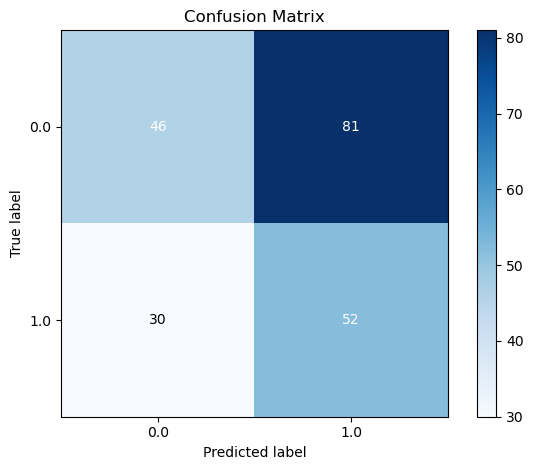

In [30]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Random forest hyper-para tuned q3')

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

[[81 46]
 [52 30]]
0.5311004784688995
              precision    recall  f1-score   support

         0.0       0.61      0.64      0.62       127
         1.0       0.39      0.37      0.38        82

    accuracy                           0.53       209
   macro avg       0.50      0.50      0.50       209
weighted avg       0.52      0.53      0.53       209



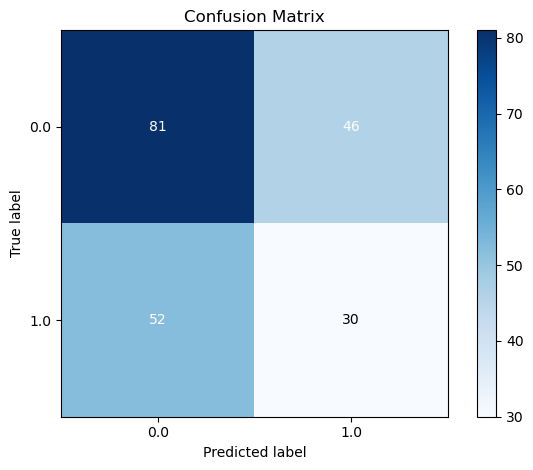

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
skplt.metrics.plot_confusion_matrix(y_test, prediction);
save_fig('Confusion Matrix for Random forest q3')
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

In [34]:
## Hyperparameter Tuning on KNN

In [41]:
from sklearn.model_selection import GridSearchCV


In [42]:
param_grid = {
    'n_neighbors' : [5, 10, 25, 50],
    'weights' : ['uniform', 'distance']
}

In [43]:
knn_grid = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_knn.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 10, 25, 50],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [44]:
best_grid = grid_search_knn.best_estimator_

In [45]:
best_grid

KNeighborsClassifier()

[[  0 127]
 [  0  82]]
Accuracy Score 0.3923444976076555
Classification report:               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       127
         1.0       0.39      1.00      0.56        82

    accuracy                           0.39       209
   macro avg       0.20      0.50      0.28       209
weighted avg       0.15      0.39      0.22       209



/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

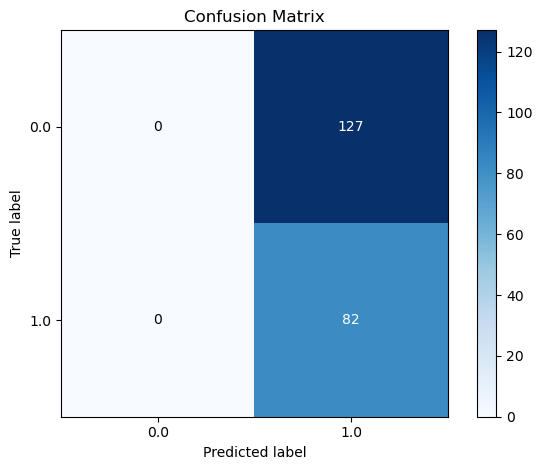

In [40]:
best_grid.fit(X_train, y_train)
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for KNN hyper-para tuned q3')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Decision Tree

In [48]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [5, 10, 15, 30],
    'max_features' : ['auto', 'sqrt']
}

In [49]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been depre

[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=Non

cated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anaconda3/envs/cse445/lib/python3.9/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/aymanibnehakim/opt/anacond

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 30],
                         'max_features': ['auto', 'sqrt'],
                         'splitter': ['best', 'random']},
             verbose=2)

In [50]:
best_grid = grid_search_dt.best_estimator_
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       splitter='random')